In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('g_hg_300-900.csv')
df

,wl,hg_1,hg_2,bg_1,bg_2
0,300.00,0.004504,0.008452,0.003517,0.005820
1,300.02,0.005820,0.005491,0.003517,0.004175
2,300.04,0.006807,0.007136,0.005162,0.004833
3,300.06,0.009439,0.008781,0.005820,0.003189
4,300.08,0.004833,0.006149,0.006149,0.005820
...,...,...,...,...,...
29996,899.92,0.004833,0.004833,0.005491,0.004833
29997,899.94,0.004833,0.007136,0.007465,0.005491
29998,899.96,0.002860,0.004175,0.008123,0.006478
29999,899.98,0.002860,0.003189,0.007136,0.004504


<Figure size 432x288 with 0 Axes>

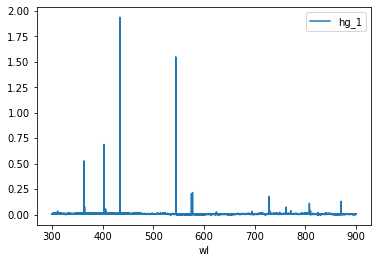

In [3]:
plt.figure()
ax = df.plot('wl','hg_1')
#df.plot('wl', 'hg_2', ax=ax)
#plt.yscale('log')
plt.show()

<Figure size 432x288 with 0 Axes>

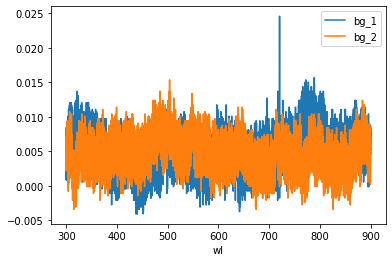

In [4]:
plt.figure()
ax = df.plot('wl','bg_1')
df.plot('wl', 'bg_2', ax=ax)
#plt.yscale('log')
plt.show()

In [5]:
df['real_1'] = df['hg_1'] - df['bg_1']
df['real_2'] = df['hg_2'] - df['bg_2']
df

,wl,hg_1,hg_2,bg_1,bg_2,real_1,real_2
0,300.00,0.004504,0.008452,0.003517,0.005820,0.000987,0.002632
1,300.02,0.005820,0.005491,0.003517,0.004175,0.002303,0.001316
2,300.04,0.006807,0.007136,0.005162,0.004833,0.001645,0.002303
3,300.06,0.009439,0.008781,0.005820,0.003189,0.003619,0.005592
4,300.08,0.004833,0.006149,0.006149,0.005820,-0.001316,0.000329
...,...,...,...,...,...,...,...
29996,899.92,0.004833,0.004833,0.005491,0.004833,-0.000658,0.000000
29997,899.94,0.004833,0.007136,0.007465,0.005491,-0.002632,0.001645
29998,899.96,0.002860,0.004175,0.008123,0.006478,-0.005263,-0.002303
29999,899.98,0.002860,0.003189,0.007136,0.004504,-0.004276,-0.001315


<Figure size 432x288 with 0 Axes>

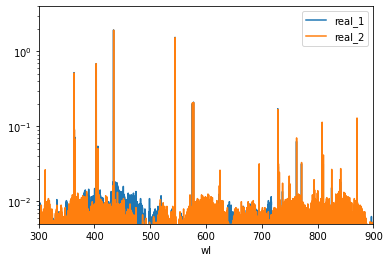

In [6]:
plt.figure()
ax = df.plot('wl','real_1')
df.plot('wl', 'real_2', ax=ax)
plt.yscale('log')
plt.xlim(300,900)
plt.ylim(5*10**(-3),4)
plt.show()

In [7]:
df.query('real_2 > 1')

,wl,hg_1,hg_2,bg_1,bg_2,real_1,real_2
6716,434.32,0.023585,1.402007,0.000886,0.004175,0.022699,1.397832
6717,434.34,0.020953,1.825074,0.001215,0.006478,0.019738,1.818596
6718,434.36,0.022269,1.930676,0.000886,0.006478,0.021383,1.924198
6719,434.38,0.015361,1.867841,0.005491,0.004504,0.009870,1.863337
6720,434.40,0.015690,1.486226,0.003517,0.006807,0.012173,1.479419
12229,544.58,0.019308,1.303313,0.007136,0.009110,0.012172,1.294203
12230,544.60,0.018322,1.485568,0.002531,0.007794,0.015791,1.477774
12231,544.62,0.015361,1.538862,0.005162,0.009110,0.010199,1.529752
12232,544.64,0.015690,1.466158,0.003517,0.010426,0.012173,1.455732
12233,544.66,0.012400,1.183894,0.003189,0.008123,0.009211,1.175771


In [8]:
df.query('1 > real_2 > 0.1')

,wl,hg_1,hg_2,bg_1,bg_2,real_1,real_2
3174,363.48,0.016677,0.135438,0.005491,0.003189,0.011186,0.132249
3175,363.50,0.016348,0.271306,0.004175,0.005162,0.012173,0.266144
3176,363.52,0.013716,0.426913,0.005491,0.006149,0.008225,0.420764
3177,363.54,0.013058,0.513435,0.004504,0.006478,0.008554,0.506957
3178,363.56,0.012729,0.525278,0.006478,0.009768,0.006251,0.515510
3179,363.58,0.010755,0.445665,0.004504,0.007465,0.006251,0.438200
3180,363.60,0.013716,0.295322,0.005820,0.003517,0.007896,0.291805
3181,363.62,0.009110,0.148597,0.006149,0.009768,0.002961,0.138829
5156,403.12,0.015361,0.202221,0.003517,0.003846,0.011844,0.198375
5157,403.14,0.010426,0.399937,0.004175,0.003189,0.006251,0.396748


<Figure size 432x288 with 0 Axes>

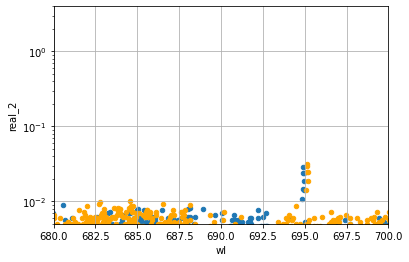

In [9]:
plt.figure()
ax = df.plot.scatter('wl','real_1')
df.plot.scatter('wl', 'real_2', ax=ax, color="orange")
plt.yscale('log')
plt.xlim(680,700)
plt.ylim(5*10**(-3),4)
plt.grid()
plt.show()

In [10]:
df.query('836<wl<842 & 0.1 > real_2 > 0.01')

,wl,hg_1,hg_2,bg_1,bg_2,real_1,real_2
26803,836.06,0.002860,0.013387,0.004833,0.002531,-0.001973,0.010856
26842,836.84,0.003189,0.013058,0.006149,0.000228,-0.002960,0.012830
26847,836.94,0.004175,0.011084,0.007136,-0.000101,-0.002961,0.011185
26848,836.96,0.005162,0.012071,0.007794,0.000886,-0.002632,0.011185
26857,837.14,0.007465,0.010097,0.005162,-0.000759,0.002303,0.010856
26865,837.30,0.004175,0.012729,0.008123,0.002531,-0.003948,0.010198
26870,837.40,0.004504,0.010426,0.003517,0.000228,0.000987,0.010198
26871,837.42,0.005820,0.012400,0.004504,0.000557,0.001316,0.011843
26873,837.46,0.002860,0.010097,0.006149,-0.002075,-0.003289,0.012172
26875,837.50,0.005162,0.008452,0.008123,-0.001746,-0.002961,0.010198


In [11]:
#1回目のデータをもとにフィッティング
xdata1 = [310.94, 363.34, 402.98, 406.07, 433.06, 434.14, 544.42, 575.30, 577.42]
ydata1 = [312.566, 365.015, 404.656, 407.781, 434.750, 435.835, 546.074, 576.959, 579.065]
f = lambda x,a,b: a*x + b
popt, pcov = curve_fit(f,xdata1,ydata1)
a_err = np.sqrt(pcov[0][0])
b_err = np.sqrt(pcov[1][1])
print('a: ', popt[0], a_err)
print('b: ', popt[1], b_err)

a:  0.9999556840487264 0.00010478332502996054
b:  1.6900418162693072 0.04805302822338817


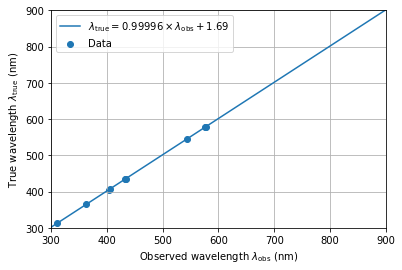

In [26]:
#1回目のデータをもとにフィッティング
plt.figure()
plt.scatter(xdata1, ydata1, label='Data')
X = np.linspace(300,900)
plt.plot(X,f(X,popt[0],popt[1]), label=r'$\lambda_{\mathrm{true}} = 0.99996 \times \lambda_{\mathrm{obs}} + 1.69$')
plt.xlim(300, 900)
plt.ylim(300, 900)
plt.xlabel(r'Observed wavelength $\lambda_{\mathrm{obs}}$ (nm)')
plt.ylabel(r'True wavelength $\lambda_{\mathrm{true}}$ (nm)')
plt.grid()
plt.legend()
plt.show()

In [13]:
#2回目のデータをもとにフィッティング
xdata2 = [311.12, 363.56, 403.18, 406.30, 433.28, 434.36, 544.62, 575.54, 577.66]
ydata2 = [312.566, 365.015, 404.656, 407.781, 434.750, 435.835, 546.074, 576.959, 579.065]
f = lambda x,a,b: a*x + b
popt2, pcov2 = curve_fit(f,xdata2,ydata2)
a_err2 = np.sqrt(pcov2[0][0])
b_err2 = np.sqrt(pcov2[1][1])
print('a: ', popt2[0], a_err2)
print('b: ', popt2[1], b_err2)

a:  0.9998282945687774 8.267471861075571e-05
b:  1.5307046388359185 0.0379319021548529


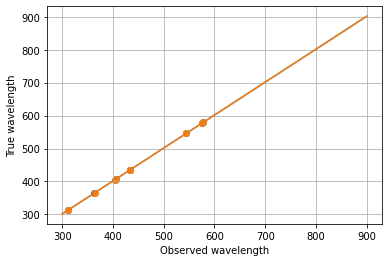

In [14]:
#1回目のデータをもとにフィッティング
plt.figure()
plt.scatter(xdata1, ydata1)
plt.scatter(xdata2,ydata2)
X = np.linspace(300,900)
plt.plot(X,f(X,popt[0],popt[1]))
plt.plot(X,f(X,popt2[0],popt2[1]))
plt.xlabel('Observed wavelength')
plt.ylabel('True wavelength')
plt.grid()
plt.show()

In [15]:
lam_real = 397
lam_obs = (lam_real - popt2[1]+0.3)/popt2[0]
print(lam_obs)

395.83726276906185
